# This is the main notebook for interrogating the results of models as they train

Could not find logger at ./training_scripts/bvae3D_actk_ref_seg_nomito_beta_1_2021-02-02/ref_model//logger_tmp.pkl
./training_scripts/bvae3D_actk_ref_seg_mito_beta_1_2021-02-02/ref_model/
{
    "batch_size": 32,
    "channels": [
        "membrane_segmentation",
        "structure",
        "nucleus_segmentation"
    ],
    "crit_decD": "nn.BCEWithLogitsLoss",
    "crit_encD": "nn.BCEWithLogitsLoss",
    "crit_recon": "integrated_cell.losses.BatchBCELoss",
    "crit_z_class": "torch.nn.NLLLoss",
    "crit_z_ref": "torch.nn.MSELoss",
    "dataProvider": "RefDataProviderACTKSeg",
    "data_save_path": "/home/rorydm/projects/pytorch_integrated_cell/examples/training_scripts/bvae3D_actk_ref_seg_mito_beta_1_2021-02-02/data_ae.pyt",
    "dtype": "float",
    "gpu_ids": [
        0
    ],
    "hostname": "dgx-aics-dcp-001",
    "imdir": "/allen/aics/modeling/rorydm/results/actk/2020-12-01_no_ceil_adjust/singlecellimages/",
    "init_meth": "normal",
    "kwargs_crit_decD": null,
    "kwargs_c

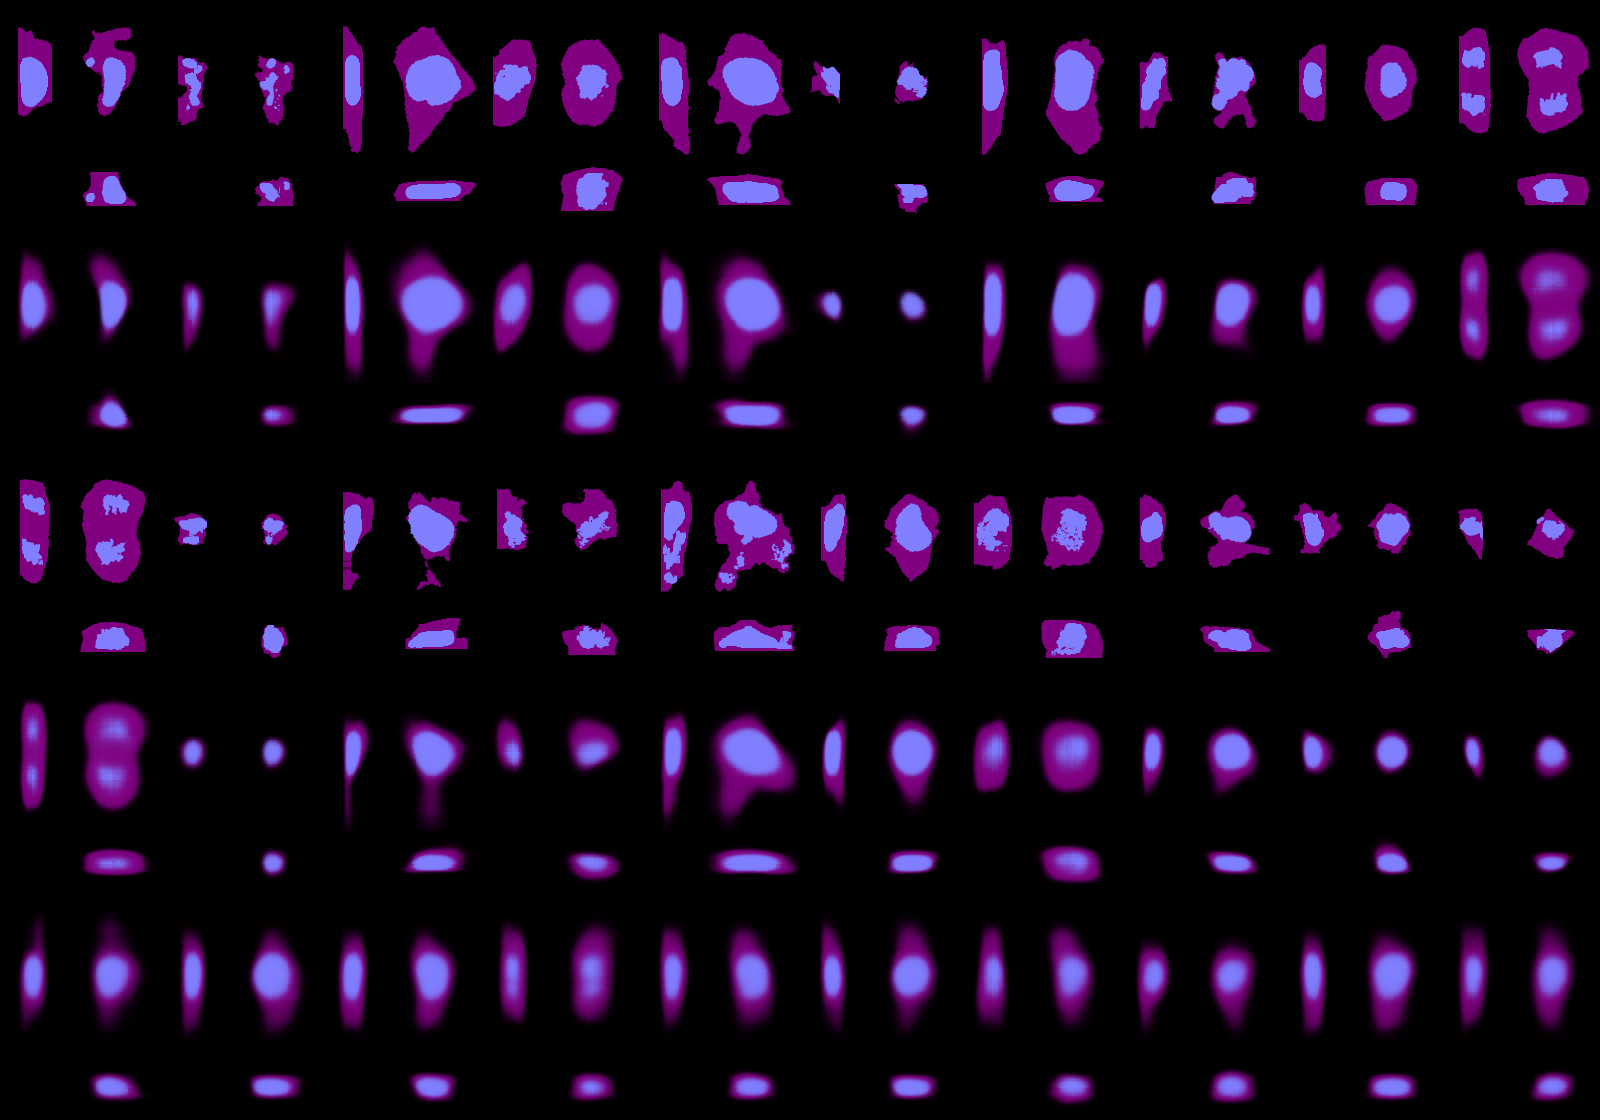

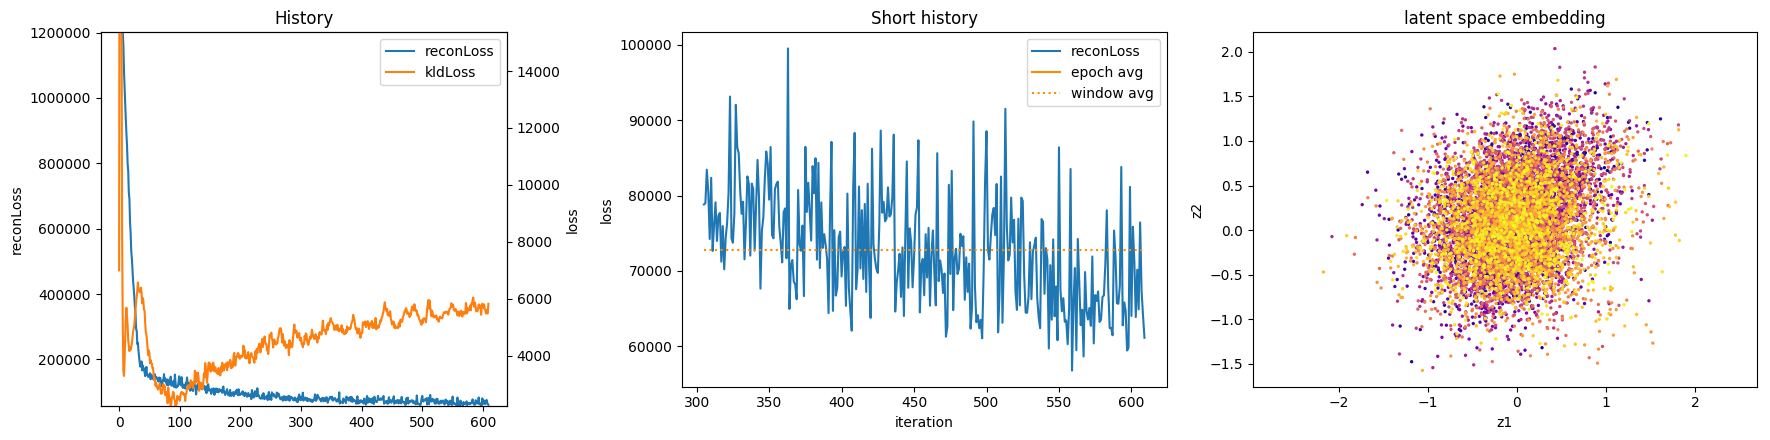

In [38]:
import torch
from IPython.core.display import display
import pickle
import os
import PIL.Image
import numpy as np
import scipy.misc as misc
import glob
import json
from natsort import natsorted

%matplotlib inline

class RenamingUnpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'integrated_cell.SimpleLogger':
            module = 'integrated_cell.simplelogger'
        return super().find_class(module, name)


import warnings
warnings.filterwarnings("ignore")

dirs_to_search = [
#     '/allen/aics/modeling/gregj/results/integrated_cell/test_cbvae_3D_avg_inten/*',
#     '/allen/aics/modeling/gregj/results/integrated_cell/test_cbvae_beta_ref/*',
#     './training_scripts/*/',
#     './training_scripts/bvae3D_ref_only',
#     './training_scripts/bvae3D',
#     './training_scripts/bvae3D_ref_only_seg',
#     './training_scripts/bvae3D_ref_only_seg_beta_1/',
#     './training_scripts/bvae3D_actk_ref_seg_beta_1/',
#     "./training_scripts/cbvae3D_actk_seg_beta_1_2020-12-17",
#     "./training_scripts/bvae3D_actk_ref_seg_beta_1_2020-12-17",
     "./training_scripts/bvae3D_actk_ref_seg_nomito_beta_1_2021-02-02",
     "./training_scripts/bvae3D_actk_ref_seg_mito_beta_1_2021-02-02",
    
]

model_dirs = list()

for my_dir in dirs_to_search:
    model_dirs += glob.glob(my_dir)

model_dirs = natsorted(model_dirs)[::-1]    
    

def show_dir(model_dir):    
    logger_file = '{0}/logger_tmp.pkl'.format(model_dir)
    
    if not os.path.exists(logger_file):
        print('Could not find logger at ' + logger_file)
        return

    print(model_dir)
    
    try:
        logger = RenamingUnpickler(open( logger_file, "rb" )).load()
        epoch = max(logger.log['epoch'])
    except:
        pass
    
    try:
        opt = pickle.load( open( '{0}/opt.pkl'.format(model_dir), "rb" ))
    except:
        opt = json.load(open( '{0}/../args.json'.format(model_dir), "rb" ))

    print(json.dumps(opt, indent=4))
    print('Epoch: ' + str(epoch))

    im_progress_path = '{0}/progress_{1}.png'.format(model_dir, int(epoch))
    im_progress = misc.imread(im_progress_path)

    im_history_path = '{0}/history.png'.format(model_dir)
    im_history = misc.imread(im_history_path)    

    im_history_short_path = '{0}/history_short.png'.format(model_dir)
    im_history_short = misc.imread(im_history_short_path)    

    im_embedding_path = '{0}/embedding.png'.format(model_dir)
    im_embedding = misc.imread(im_embedding_path)        

    display(PIL.Image.fromarray(im_progress))
    display(PIL.Image.fromarray(np.concatenate((im_history, im_history_short, im_embedding), 1)))
    print(' ')
    
for model_dir in model_dirs:
    sub_dirs = glob.glob(os.path.join(model_dir, 'ref_model/'))
    for sub_dir in sub_dirs:
        try:
            show_dir(sub_dir)
        except:
            print('could not load ' + model_dir)
            